# Support Vector Classifiers - Wine Color Prediction
Neil John Catapang

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay


## Reading the two datasets
There are two datasets in the zip file, which are wine quality datasets for red wine and white wine, respectively.

In [2]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

# Join the datasets
wine = pd.concat([red_wine, white_wine], ignore_index=True)
feature_list = wine.columns.difference(['wine_type', 'quality'])

# Convert wine_type to numeric (0 - red, 1 - white)
encoder = LabelEncoder()
wine['wine_type'] = encoder.fit_transform(wine['wine_type'])
display(wine)
wine.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


EDA was skipped, since this dataset has already been analyzed before. No features will be removed for the first SVC model created in this assignment to preserve relevant information for prediction of color of wine.

## Train-test Split
In this assignment, I used <code>GridSearchCV</code> to search for the best set of hyperparameters of SVM. Since this already employs cross-validation, I will only split the data into training set and test set, with ratio 70:30.

In [3]:
# Train-test Split for Logistic Regression (Color Prediction)
X = wine.drop(columns=['wine_type']).to_numpy()
y = wine['wine_type'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'SVC - Wine Color Prediction')
print(X_train.shape)
print(X_test.shape)

SVC - Wine Color Prediction
(4547, 12)
(1950, 12)


## Support Vector Classifier
In this assignment, I applied hyperparameter search with cross-validation using <code>GridSearchCV</code> to create the best model with tuned hyperparameters. I decided to apply grid search since there are many hyperparameters which can be tuned for a support vector classifier, such as <code>C</code>, <code>kernel</code>, and <code>gamma</code>.

### Training and Hyperparameter Search

The values I specified for the SVC hyperparameters are:

1. <code>C</code>: 0.1, 1, and 10 (varying regularization constant)
2. <code>kernel</code>: 'linear' and 'rbf' (kernel trick to improve classifier performance by allowing nonlinear decision boundaries)
3. <code>gamma</code>: a hyperparameter specific to SVC with rbf, poly, or sigmoid kernel. This controls smoothness of decision boundaries.

In [ ]:
# The base support vector classifier pipeline
base_svm = make_pipeline(StandardScaler(), SVC())

# Specify grid of hyperparameters
param_grid = {
    "svc__C": [0.1, 1, 10],
    "svc__kernel": ["linear", "rbf"],
    "svc__gamma": ["scale", "auto"],
}

grid = GridSearchCV(base_svm, param_grid, scoring='roc_auc', cv=5, verbose=3, n_jobs=-1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=3)

The hyperparameter search was done, and the results are shown below.

In [5]:
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best ROC_AUC (Cross-Validation):", grid.best_score_)

Best Parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best ROC_AUC (Cross-Validation): 0.9981610265850887


We have created a SVC model with ROC_AUC score of 0.9982 using the best hyperparameters found shown above. We can now evaluate the model on the test set to check its performance on unseen data.

### Evaluating the Best SVC on Test Data

In [ ]:
# Accuracy and Confusion Matrix
print(f"Accuracy = {best_model.score(X_test, y_test)}")
print('Confusion Matrix')
y_test_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))

# Classification Report
print(classification_report(y_test, y_test_pred, target_names=['Red', 'White']))

Accuracy = 0.9948717948717949
Confusion Matrix
[[ 493    9]
 [   1 1447]]
              precision    recall  f1-score   support

         Red       1.00      0.98      0.99       502
       White       0.99      1.00      1.00      1448

    accuracy                           0.99      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



The metrics above show that the best model has a very high classification performance on the test set. Model accuracy reached 99.49%, and the confusion matrix show only 10 misclassifications (9 false positives and 1 false negative) out of 1950 test points.

### (Experiment) Decision Boundary Using Only Two Features

The previous model uses 12 features, which make the decision boundary hard to visualize in 2D. In this section, we try to create a model which processes only two features (most important features) so we can create a simpler decision boundary visualization.

In [7]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_model, X_test, y_test, scoring="roc_auc")
sorted_indices = np.argsort(perm_importance.importances_mean)[::-1]

print('Top 2 Most Important Features:')
for i in range(2):
    print(sorted_indices[i], wine.columns[sorted_indices[i]])

Top 2 Most Important Features:
7 density
6 total sulfur dioxide


From the results above, we select density and total sulfur dioxide as the features for training another SVC model for the purpose of decision boundary display.

In [8]:
# Create a new feature array using density and total SO2
X2 = X[:, [7, 6]]
y2 = y

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# The base support vector classifier
base_svm_2 = make_pipeline(StandardScaler(), SVC())

grid_2 = GridSearchCV(base_svm_2, param_grid, scoring='roc_auc', cv=5, verbose=3, n_jobs=-1)
grid_2.fit(X2_train, y2_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=3)

In [9]:
print('2-Feature SVC GridSearchCV')

best_model_2 = grid_2.best_estimator_
print("Best Parameters:", grid_2.best_params_)
print("Best ROC_AUC (Cross-Validation):", grid_2.best_score_)

2-Feature SVC GridSearchCV
Best Parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best ROC_AUC (Cross-Validation): 0.9848940236191577


A high ROC-AUC score was still achieved even when only 2 features were used. This suggests that the wine color prediction is dominated by only few features, and others may not be necessary for this problem.

In [10]:
# Accuracy and Confusion Matrix
print(f"Accuracy = {best_model_2.score(X2_test, y2_test)}")
print('Confusion Matrix')
y2_test_pred = best_model_2.predict(X2_test)
print(confusion_matrix(y2_test, y2_test_pred))

# Classification Report
print(classification_report(y2_test, y2_test_pred, target_names=['Red', 'White']))

Accuracy = 0.9538461538461539
Confusion Matrix
[[ 436   66]
 [  24 1424]]
              precision    recall  f1-score   support

         Red       0.95      0.87      0.91       502
       White       0.96      0.98      0.97      1448

    accuracy                           0.95      1950
   macro avg       0.95      0.93      0.94      1950
weighted avg       0.95      0.95      0.95      1950



Very high accuracy, precision, and recall was achieved on the test set using only the 2 most important features. This confirms the validity of the model to predict wine color on unseen data. We can now proceed to visualization of decision boundary.

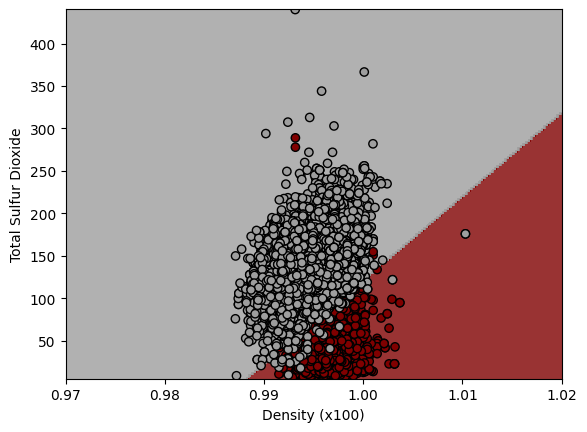

In [11]:
from matplotlib.colors import ListedColormap

# Wine color map
color_map = {0: "#800000", 1: "#9e9e9e"}
colors = [color_map[label] for label in y2]
cmap = ListedColormap(colors)

# Display the decision boundary (All data points)
DecisionBoundaryDisplay.from_estimator(best_model_2, X2, response_method="predict", alpha=0.8,
                                       eps=0.5, cmap=cmap, grid_resolution=4000)

# Scatter plot the original data points
plt.scatter(X2[:, 0], X2[:, 1], c=colors, edgecolors="k")

plt.xlabel('Density (x100)')
plt.xlim(0.97, 1.02)
plt.ylabel('Total Sulfur Dioxide')
plt.show()

The decision boundary looks jagged due to resolution issues, which stemmed up from the large difference in the scaling of density and total sulfur dioxide. Nevertheless, the boundary separates the two classes very well in the graph.

### (Experiment) Decision Boundary Using Two Principal Components

The first model uses 12 features, which make the decision boundary hard to visualize in 2D. In this section, we try to create a model which processes only two features (first two principal components) so we can create a simpler decision boundary visualization.

In [12]:
from sklearn.decomposition import PCA

PC_pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))
X3 = PC_pipeline.fit_transform(X)
y3 = y
print("First 2 Principal Components:\n", X3)

First 2 Principal Components:
 [[-3.34843817  0.56892617]
 [-3.22859545  1.19733465]
 [-3.23746833  0.95258001]
 ...
 [ 0.62692235 -0.62214478]
 [ 0.49193416 -3.75592792]
 [ 0.76155534 -2.7678397 ]]


In [13]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# The base support vector classifier
base_svm_3 = SVC()

# Specify grid of hyperparameters
param_grid_3 = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"],
}

grid_3 = GridSearchCV(base_svm_3, param_grid_3, scoring='roc_auc', cv=5, verbose=3, n_jobs=-1)
grid_3.fit(X3_train, y3_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=3)

In [14]:
print('SVC-PCA GridSearchCV')

best_model_3 = grid_3.best_estimator_
print("Best Parameters:", grid_3.best_params_)
print("Best ROC_AUC (Cross-Validation):", grid_3.best_score_)

SVC-PCA GridSearchCV
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best ROC_AUC (Cross-Validation): 0.9952275223948839


In [ ]:
# Accuracy and Confusion Matrix
print(f"Accuracy = {best_model_3.score(X3_test, y3_test)}")
print('Confusion Matrix')
y3_test_pred = best_model_3.predict(X3_test)
print(confusion_matrix(y3_test, y3_test_pred))

# Classification Report
print(classification_report(y3_test, y3_test_pred, target_names=['Red', 'White']))

Accuracy = 0.9774358974358974
Confusion Matrix
[[ 483   19]
 [  25 1423]]
              precision    recall  f1-score   support

         Red       0.95      0.96      0.96       502
       White       0.99      0.98      0.98      1448

    accuracy                           0.98      1950
   macro avg       0.97      0.97      0.97      1950
weighted avg       0.98      0.98      0.98      1950



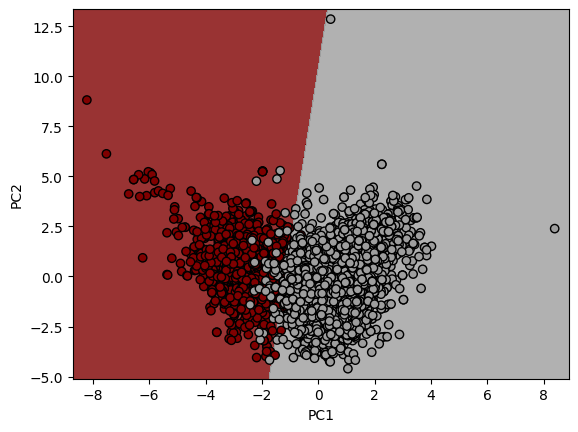

In [16]:
# Wine color map
color_map = {0: "#800000", 1: "#9e9e9e"}
colors = [color_map[label] for label in y3]
cmap = ListedColormap(colors)

# Display the decision boundary (All data points)
DecisionBoundaryDisplay.from_estimator(best_model_3, X3, response_method="predict", alpha=0.8,
                                       eps=0.5, cmap=cmap, grid_resolution=4000)

# Scatter plot the original data points
plt.scatter(X3[:, 0], X3[:, 1], c=colors, edgecolors="k")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()